# Контрольная по Машинному Обучению

In [104]:
# coding: utf-8

import os
import random
import itertools

from nltk import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

In [105]:
# Кто на кого похож? Угадать автора по песне? Кластеризовать песни? Кластеризовать по темам
# LDA
arr_corpora = {}

df_small = pd.read_csv('./songs_smaller.csv', header=0, sep='\t')
df_small.head()

,artist,song,text
0,The Beatles,A Shot Of Rhythm And Blues,"Well, if your hands start a-clappin' \nAnd yo..."
1,The Beatles,Across The Universe,Words are flowing out like \nEndless rain int...
2,The Beatles,All I've Got To Do,"Whenever I want you around, yeah \nAll I gott..."
3,The Beatles,And I Love Her,I give her all my love \nThat's all I do \nA...
4,The Beatles,And Your Bird Can Sing,You tell me that you've got everything you wan...


In [106]:
df_big = pd.read_csv('./songdata.csv', header=0, sep=',')
df_big.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [107]:
df_small.describe()

,artist,song,text
count,1595,1595,1595
unique,9,1567,1594
top,Bob Dylan,I Want You,No matter how hard I try \nYou keep pushing m...
freq,188,4,2


In [108]:
df_big.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/r/richard+marx/goodbye+hollywood_20116047.html,I've got sunshine on a cloudy day \nWhen it's...
freq,191,35,1,6


In [109]:
df_small.groupby('artist').describe()

song  \
artist                                                  
Bob Dylan         count                           188   
                  unique                          188   
                  top     Had A Dream About You, Baby   
                  freq                              1   
Cher              count                           187   
                  unique                          187   
                  top               Bell Bottom Blues   
                  freq                              1   
David Bowie       count                           165   
                  unique                          165   
                  top             Don't Bring Me Down   
                  freq                              1   
Hank Williams Jr. count                           185   
                  unique                          185   
                  top                Ready To Go Home   
                  freq                              1   
Iggy Pop          count                           177   
                  unique                          177   
                  top                   Eggs On Plate   
                  freq                              1   
Kiss              count                           183   
                  unique                          183   
                  top                      No, No, No   
                  freq                              1   
Korn              count                           166   
                  unique                          166   
                  top               Kill Mercy Within   
                  freq                              1   
Marilyn Manson    count                           166   
                  unique                          166   
                  top                       Moonshine   
                  freq                              1   
The Beatles       count                           178   
                  unique                          178   
                  top                        Michelle   
                  freq                              1   

                                                                       text  
artist                                                                       
Bob Dylan         count                                                 188  
                  unique                                                188  
                  top     Well, I wish I was in London,  \nOr some other...  
                  freq                                                    1  
Cher              count                                                 187  
                  unique                                                186  
                  top     No matter how hard I try  \nYou keep pushing m...  
                  freq                                                    2  
David Bowie       count                                                 165  
                  unique                                                165  
                  top     Stinky weather fat, shaky hands  \nDopey morni...  
                  freq                                                    1  
Hank Williams Jr. count                                                 185  
                  unique                                                185  
                  top     Been there,done that.Every spot on the map.  \...  
                  freq                                                    1  
Iggy Pop          count                                                 177  
                  unique                                                177  
                  top     And now the news  \n  \n[Chorus:]  \nLouie Lou...  
                  freq                                                    1  
Kiss              count                                                 183  
                  unique                                                183  
          

In [110]:
df_big.groupby('artist').describe()

link  \
artist                                                                    
'n Sync       count                                                  93   
              unique                                                 93   
              top     /n/n+sync/loves+in+our+hearts+on+christmas+day...   
              freq                                                    1   
ABBA          count                                                 113   
              unique                                                113   
              top         /a/abba/lay+all+your+love+on+me_20002834.html   
              freq                                                    1   
Ace Of Base   count                                                  74   
              unique                                                 74   
              top              /a/ace+of+base/blooming+18_20003624.html   
              freq                                                    1   
Adam Sandler  count                                                  70   
              unique                                                 70   
              top        /a/adam+sandler/like+a+hurricane_20836625.html   
              freq                                                    1   
Adele         count                                                  54   
              unique                                                 54   
              top               /a/adele/someone+like+you_20895042.html   
              freq                                                    1   
Aerosmith     count                                                 171   
              unique                                                171   
              top       /a/aerosmith/another+last+goodbye_21020039.html   
              freq                                                    1   
Air Supply    count                                                 174   
              unique                                                174   
              top     /a/air+supply/looking+out+for+something+outsid...   
              freq                                                    1   
Aiza Seguerra count                                                  25   
              unique                                                 25   
...                                                                 ...   
Zeromancer    top               /z/zeromancer/new+madonna_20287976.html   
              freq                                                    1   
Ziggy Marley  count                                                  64   
              unique                                                 64   
              top       /z/ziggy+marley/look+whos+dancing_20236482.html   
              freq                                                    1   
Zoe           count                                                   1   
              unique                                                  1   
              top          /z/zoe/sunshine+on+a+rainy+day_20276204.html   
              freq                                                    1   
Zoegirl       count                                                  38   
              unique                                                 38   
              top                   /z/zoegirl/inside+out_10198593.html   
              freq                                                    1   
Zornik        count                                                  12   
              unique                                                 12   
              top              /z/zornik/destination+zero_20190434.html   
              freq                                                    1   
Zox           count                                                  21   
              unique                                                 21   
              top                       /z/zox/leaving+me_20249168.html   
              fre

Будем работать с маленьким датасетом, потому что там для каждого певца побольше песен, это лучше для обучения. Не понимаю, как обучаться на 12 песнях

In [111]:
X, y = df_small['text'], df_small['artist']

In [112]:
#  Поделить выборку в соотновении 80:20
text_train, text_test, artist_train, artist_test = train_test_split(X, y, test_size=0.2)

# BOW

In [130]:
# Векторизация
bow = CountVectorizer(stop_words='english', analyzer='word')
bow.fit_transform(text_train)

# Векторизуем тестовую и тренировочную выборки
train_bowed_messages = bow.transform(text_train)
test_bowed_messages = bow.transform(text_test)

In [125]:
# Обучение DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf = clf.fit(train_bowed_messages, artist_train)

# Вывод результатов по Dummy Classifier
print(classification_report(artist_test, clf.predict(test_bowed_messages)))

                   precision    recall  f1-score   support

        Bob Dylan       0.00      0.00      0.00        40
             Cher       0.12      1.00      0.21        37
      David Bowie       0.00      0.00      0.00        26
Hank Williams Jr.       0.00      0.00      0.00        35
         Iggy Pop       0.00      0.00      0.00        36
             Kiss       0.00      0.00      0.00        45
             Korn       0.00      0.00      0.00        29
   Marilyn Manson       0.00      0.00      0.00        30
      The Beatles       0.00      0.00      0.00        41

      avg / total       0.01      0.12      0.02       319



/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB + BOW

In [131]:
print('\nNaive Bayes 1')
naive_model = MultinomialNB()
naive_model.fit(train_bowed_messages, artist_train)

print(classification_report(artist_test, naive_model.predict(test_bowed_messages)))


Naive Bayes 1
                   precision    recall  f1-score   support

        Bob Dylan       0.50      0.50      0.50        40
             Cher       0.30      0.49      0.37        37
      David Bowie       0.33      0.23      0.27        26
Hank Williams Jr.       0.48      0.63      0.54        35
         Iggy Pop       0.43      0.28      0.34        36
             Kiss       0.56      0.69      0.62        45
             Korn       0.59      0.76      0.67        29
   Marilyn Manson       0.65      0.43      0.52        30
      The Beatles       0.40      0.20      0.26        41

      avg / total       0.47      0.47      0.46       319



Confusion matrix, without normalization
[[20  6  3  7  1  1  0  0  2]
 [ 5 18  0  4  1  4  1  2  2]
 [ 3  6  6  1  3  4  0  0  3]
 [ 3  4  0 22  2  1  0  1  2]
 [ 2  4  4  4 10  5  5  0  2]
 [ 1  7  1  2  2 31  1  0  0]
 [ 1  1  0  0  2  1 22  1  1]
 [ 2  2  0  2  2  2  7 13  0]
 [ 3 12  4  4  0  6  1  3  8]]


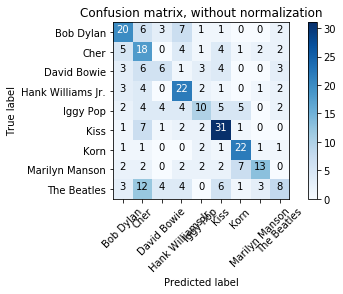

In [132]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(artist_test, naive_model.predict(test_bowed_messages))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=naive_model.classes_,
                      title='Confusion matrix, without normalization')
plt.show()

David Bowie, Beatles и Iggy Pop определяется хуже всего

## TF-IDF

In [118]:
# Векторизация TF-IDF
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             sublinear_tf=True,
                             use_idf=True,
                             stop_words='english')

train_tfidf_texts = vectorizer.fit_transform(text_train)
test_tfidf_texts = vectorizer.transform(text_test)

In [119]:
# Обучение DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf = clf.fit(train_tfidf_texts, artist_train)

# Вывод результатов по Dummy Classifier
print(classification_report(artist_test, clf.predict(test_tfidf_texts)))

                   precision    recall  f1-score   support

        Bob Dylan       0.00      0.00      0.00        40
             Cher       0.12      1.00      0.21        37
      David Bowie       0.00      0.00      0.00        26
Hank Williams Jr.       0.00      0.00      0.00        35
         Iggy Pop       0.00      0.00      0.00        36
             Kiss       0.00      0.00      0.00        45
             Korn       0.00      0.00      0.00        29
   Marilyn Manson       0.00      0.00      0.00        30
      The Beatles       0.00      0.00      0.00        41

      avg / total       0.01      0.12      0.02       319



/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## LogisticRegression + TF-IDF

In [120]:
# Обучаем модель логистической регрессии
logit_tfidf = LogisticRegression(class_weight='balanced')
logit_tfidf.fit(train_tfidf_texts, artist_train)

# Печатаем результаты классификации
print(classification_report(artist_test, logit_tfidf.predict(test_tfidf_texts)))

                   precision    recall  f1-score   support

        Bob Dylan       0.58      0.55      0.56        40
             Cher       0.49      0.46      0.47        37
      David Bowie       0.27      0.35      0.31        26
Hank Williams Jr.       0.68      0.77      0.72        35
         Iggy Pop       0.52      0.39      0.44        36
             Kiss       0.65      0.67      0.66        45
             Korn       0.57      0.69      0.62        29
   Marilyn Manson       0.55      0.60      0.57        30
      The Beatles       0.53      0.41      0.47        41

      avg / total       0.55      0.55      0.54       319



Confusion matrix, without normalization
[[22  3  2  4  2  1  1  1  4]
 [ 5 17  3  1  1  4  2  2  2]
 [ 3  3  9  1  2  0  1  3  4]
 [ 2  2  0 27  1  1  0  0  2]
 [ 2  2 10  0 14  4  2  2  0]
 [ 2  3  3  1  2 30  2  1  1]
 [ 1  0  1  1  2  0 20  3  1]
 [ 0  0  2  0  2  1  6 18  1]
 [ 1  5  3  5  1  5  1  3 17]]


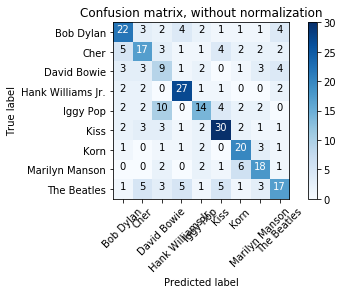

In [121]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(artist_test, logit_tfidf.predict(test_tfidf_texts))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=logit_tfidf.classes_,
                      title='Confusion matrix, without normalization')
plt.show()

Кажется, что логит регрессия + tf-idf справляется лучше, чем Байес + мешок слов. David Bowie, Beatles и Iggy Pop определяется хуже всего

# DecisionTree + tf_idf

In [122]:
# Обучаем модель логистической регрессии
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(train_tfidf_texts, artist_train)

# Печатаем результаты классификации
print(classification_report(artist_test, dt_tfidf.predict(test_tfidf_texts)))

                   precision    recall  f1-score   support

        Bob Dylan       0.31      0.28      0.29        40
             Cher       0.40      0.32      0.36        37
      David Bowie       0.09      0.12      0.10        26
Hank Williams Jr.       0.34      0.31      0.33        35
         Iggy Pop       0.16      0.14      0.15        36
             Kiss       0.47      0.42      0.45        45
             Korn       0.38      0.38      0.38        29
   Marilyn Manson       0.24      0.33      0.28        30
      The Beatles       0.14      0.17      0.16        41

      avg / total       0.29      0.28      0.28       319



In [123]:
# Обучаем модель логистической регрессии
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(train_tfidf_texts, artist_train)

# Печатаем результаты классификации
print(classification_report(artist_test, rf_tfidf.predict(test_tfidf_texts)))

                   precision    recall  f1-score   support

        Bob Dylan       0.32      0.45      0.37        40
             Cher       0.29      0.35      0.32        37
      David Bowie       0.11      0.12      0.11        26
Hank Williams Jr.       0.63      0.54      0.58        35
         Iggy Pop       0.11      0.08      0.09        36
             Kiss       0.47      0.36      0.41        45
             Korn       0.42      0.48      0.45        29
   Marilyn Manson       0.30      0.27      0.28        30
      The Beatles       0.26      0.24      0.25        41

      avg / total       0.33      0.33      0.32       319



Совсем не очень, для этого даже не надо смотреть на confusion matrix

## Word2Vec

Обучим нашу модель на все корпусе текстов песен

In [20]:
import sys
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [35]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatisation(text):
    text = text.lower()
    words = wordpunct_tokenize(text)
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

In [36]:
w = open('texts.txt', 'w')
for line in df_big['text']:
    w.write(lemmatisation(line.replace('\n', ' ')))

In [37]:
f = 'texts.txt'
data = gensim.models.word2vec.LineSentence(f)

In [38]:
# Тренируем модель на основе распаршенный данных
# Чем больше размер векторов, тем больше данных мы можем учесть
# Окно наблюдения - сколько соседей слева справа мы используем
model = gensim.models.Word2Vec(data, size=500, window=10, min_count=2, sg=0)

2017-03-31 13:27:37,394 : INFO : collecting all words and their counts
2017-03-31 13:27:39,809 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-03-31 13:27:42,884 : INFO : collected 105699 word types from a corpus of 15171024 raw words and 1518 sentences
2017-03-31 13:27:42,885 : INFO : Loading a fresh vocabulary
2017-03-31 13:27:43,076 : INFO : min_count=2 retains 48529 unique words (45% of original 105699, drops 57170)
2017-03-31 13:27:43,077 : INFO : min_count=2 leaves 15113854 word corpus (99% of original 15171024, drops 57170)
2017-03-31 13:27:43,245 : INFO : deleting the raw counts dictionary of 105699 items
2017-03-31 13:27:43,264 : INFO : sample=0.001 downsamples 68 most-common words
2017-03-31 13:27:43,264 : INFO : downsampling leaves estimated 10252595 word corpus (67.8% of prior 15113854)
2017-03-31 13:27:43,265 : INFO : estimated required memory for 48529 words and 500 dimensions: 218380500 bytes
2017-03-31 13:27:43,643 : INFO : resetting laye

In [39]:
model.init_sims(replace=True)

2017-03-31 13:30:54,671 : INFO : precomputing L2-norms of word weight vectors


In [40]:
print(len(model.wv.vocab))

48529


In [41]:
model.save('my_first.model')

2017-03-31 13:30:57,097 : INFO : saving Word2Vec object under my_first.model, separately None
2017-03-31 13:30:57,099 : INFO : not storing attribute syn0norm
2017-03-31 13:30:57,102 : INFO : storing np array 'syn0' to my_first.model.wv.syn0.npy
2017-03-31 13:30:57,418 : INFO : storing np array 'syn1neg' to my_first.model.syn1neg.npy
2017-03-31 13:30:57,844 : INFO : not storing attribute cum_table
2017-03-31 13:30:58,106 : INFO : saved my_first.model


Посмотрим, насколько хорошо обучилась наша модель

In [44]:
words = ['today', 'yesterday', 'I', 'you', 'darling']

In [45]:
for word in words:
    # есть ли слово в модели? Может быть, и нет
    if word in model:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print(word + ' is not present in the model')


today
[ 0.   -0.02  0.08  0.04 -0.02  0.05 -0.01  0.03 -0.02  0.03]
tomorrow 0.5931691527366638
yesterday 0.5846296548843384
sorrow 0.3633683919906616
day 0.3545335531234741
beheading 0.32847481966018677
okay 0.322119802236557
away 0.3210099935531616
anyway 0.3162398338317871
unapologetic 0.30836886167526245
future 0.3070555627346039


yesterday
[-0.08 -0.08  0.06  0.06  0.02 -0.05 -0.02  0.03  0.01 -0.02]
today 0.5846296548843384
tomorrow 0.516761302947998
faded 0.42788928747177124
memory 0.41209205985069275
past 0.4088594615459442
sorrow 0.40063080191612244
childhood 0.37101584672927856
wonseems 0.36436623334884644
disappeared 0.3578571081161499
future 0.3526468276977539


I is not present in the model
you
[ 0.06 -0.1   0.05 -0.01 -0.02  0.11 -0.02  0.01  0.01 -0.02]
me 0.6652208566665649
i 0.6193846464157104
baby 0.5200074315071106
that 0.4722106158733368
what 0.46474289894104004
love 0.4446551203727722
if 0.42858877778053284
just 0.4258091151714325
your 0.4219856858253479
cause 0.4

Кажется, все не так плохо, можно с этим работать. Напишем классификатор

In [54]:
from __future__ import division
def mean(a):
    return sum(a) / len(a)


def word2vec_mean(text):
    """Усредняет вектор слов."""
    arr = []
    clean_text = lemmatisation(text)
    # для каждого слова в тексте выводим его вектор
    for word in clean_text.split(' '):
        # есть ли слово в модели? Может быть, и нет
        if word in model:
            arr.append(model[word])
    if len(list(map(mean, zip(*arr)))) != 0:
        return list(map(mean, zip(*arr)))
    else:
        return [0 for i in range(0, 300)]



class FunctionFeaturizer(TransformerMixin):
    """ Для создания своего вектора я использовала усредненную векторизацию с помощью word2vec"""
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        fvs = []
        # fvs = word2vec_mean(X)  # если подавать по словам, а не датафрейм
        for datum in X:
            fv = word2vec_mean(datum)
            fvs.append(fv)
        return np.array(fvs)

In [55]:
w2v_featurizer = FunctionFeaturizer()  # создание своего векторизатора

In [56]:
def do_smth_with_model(data_train, class_train, data_test, class_test, steps):
    print('\nModel train')
    pipeline = Pipeline(steps=steps)

    cv_results = cross_val_score(pipeline,
                                 data_train,
                                 class_train,
                                 cv=10,
                                 scoring='accuracy',
                                )
    print(cv_results.mean(), cv_results.std())

    pipeline.fit(data_train, class_train)
    class_predicted = pipeline.predict(data_test)
    print(class_predicted)

    print(classification_report(class_test, class_predicted ))

    return pipeline, class_predicted

In [57]:
# Свой векторизатор
print('\nCustom Transformer')
lr_pipeline, label_predicted = do_smth_with_model(text_train, artist_train,
                                               text_test, artist_test, 
                                               steps=[('custom', w2v_featurizer),
                                                      ('classifier', LogisticRegression())])


Custom Transformer

Model train
0.393418913172 0.0274186866514
['Bob Dylan' 'Kiss' 'Kiss' 'Bob Dylan' 'Iggy Pop' 'Kiss' 'The Beatles'
 'Kiss' 'Hank Williams Jr.' 'Korn' 'Hank Williams Jr.' 'Iggy Pop' 'Kiss'
 'Iggy Pop' 'Bob Dylan' 'Bob Dylan' 'Bob Dylan' 'The Beatles' 'Bob Dylan'
 'Kiss' 'Hank Williams Jr.' 'Korn' 'Bob Dylan' 'Iggy Pop' 'Bob Dylan'
 'Kiss' 'Korn' 'Iggy Pop' 'Hank Williams Jr.' 'Iggy Pop' 'Bob Dylan'
 'Hank Williams Jr.' 'Kiss' 'David Bowie' 'Hank Williams Jr.' 'Iggy Pop'
 'The Beatles' 'Kiss' 'Kiss' 'Kiss' 'Kiss' 'Bob Dylan' 'Cher' 'Kiss' 'Korn'
 'Kiss' 'Bob Dylan' 'The Beatles' 'Iggy Pop' 'Bob Dylan' 'Bob Dylan'
 'David Bowie' 'Iggy Pop' 'Korn' 'Bob Dylan' 'David Bowie' 'Bob Dylan'
 'Kiss' 'Hank Williams Jr.' 'Bob Dylan' 'The Beatles' 'Korn' 'Kiss'
 'Hank Williams Jr.' 'David Bowie' 'Bob Dylan' 'Hank Williams Jr.'
 'Hank Williams Jr.' 'Kiss' 'Bob Dylan' 'Iggy Pop' 'Bob Dylan' 'Cher'
 'Kiss' 'Kiss' 'Marilyn Manson' 'Kiss' 'Kiss' 'Kiss' 'Cher' 'Cher'
 'Iggy Pop' 'Kiss'

Confusion matrix, without normalization
[[21  0  0  5  2  5  1  0  4]
 [ 4 12  1  4  3 17  4  0  3]
 [ 9  0  4  0  5  3  5  0  0]
 [12  5  0 19  3  5  0  0  0]
 [ 2  1  1  1 12 12  0  0  1]
 [ 2  3  0  1  0 24  1  0  0]
 [ 0  1  1  0  2  4 16  0  1]
 [ 3  0  4  0  9  9 11  4  2]
 [ 9  3  1  3  0 11  1  0  7]]


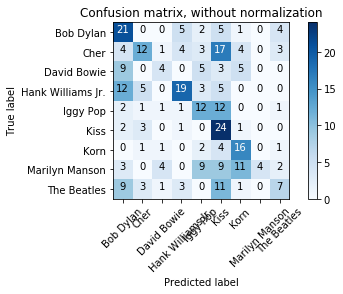

In [58]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(artist_test, lr_pipeline.predict(text_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=lr_pipeline.classes_,
                      title='Confusion matrix, without normalization')
plt.show()

Результаты не намного лучше. Странно, что Manson теперь определяется хуже. Iggy Pop стал определяться лучше, чем было

Попробуем кластеризацию

## К-means + TF-IDF

In [86]:
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000, strip_accents='unicode', analyzer='word')
X = tfidf.fit_transform(df_small['text'])

In [62]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [64]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(df_small['artist'], labels))
print("Completeness: %0.3f" % metrics.completeness_score(df_small['artist'], labels))
print("V-measure: %0.3f" % metrics.v_measure_score(df_small['artist'], labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(df_small['artist'], labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(df_small['artist'], labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Homogeneity: 0.057
Completeness: 0.065
V-measure: 0.061
Adjusted Rand Index: 0.032
Adjusted Mutual Information: 0.048
Silhouette Coefficient: 0.006


Silhouette Coefficient очень маленький, это плохо, это значит, что кластеры не достаточно сильно отдалены друг от друга
Если Homogeneity высокий, это значит, что каждый из получившихся кластеров содержит элементы только из своего кластера. У нас получилось не так :(

# LDA

In [144]:
arr_new = []
for line in df_big['text']:
    arr_new.append(line.replace('\n', ' '))

In [156]:
texts_new = []
for i in arr_new:
    texts_new.append(lemmatisation(i).split())

In [ ]:
from gensim import corpora, models

dictionary = corpora.Dictionary(texts_new)

2017-03-31 14:45:47,966 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2017-03-31 14:45:50,038 : INFO : adding document #10000 to Dictionary(29771 unique tokens: ['bel', 'minutong', 'perversion', 'proudly', 'harfen']...)
2017-03-31 14:45:52,273 : INFO : adding document #20000 to Dictionary(43127 unique tokens: ['bel', 'pyrochlast', 'minutong', 'manichevitz', 'perversion']...)
2017-03-31 14:45:54,423 : INFO : adding document #30000 to Dictionary(52685 unique tokens: ['bel', 'minutong', 'perversion', 'suiting', 'ascendancy']...)
2017-03-31 14:45:56,678 : INFO : adding document #40000 to Dictionary(60916 unique tokens: ['bel', 'minutong', 'urstas', 'perversion', 'yioh']...)
2017-03-31 14:45:58,784 : INFO : adding document #50000 to Dictionary(69970 unique tokens: ['bel', 'nogjima', 'minutong', 'urstas', 'perversion']...)
2017-03-31 14:46:00,428 : INFO : built Dictionary(75200 unique tokens: ['bel', 'nogjima', 'minutong', 'urstas', 'perversion']...) from 57650 documents (to

In [ ]:
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts_new]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=9, id2word = dictionary, passes=5)

2017-03-31 14:46:11,570 : INFO : using symmetric alpha at 0.1111111111111111
2017-03-31 14:46:11,571 : INFO : using symmetric eta at 1.3297872340425532e-05
2017-03-31 14:46:11,596 : INFO : using serial LDA version on this node
2017-03-31 14:46:15,038 : INFO : running online LDA training, 9 topics, 5 passes over the supplied corpus of 57650 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2017-03-31 14:46:15,040 : INFO : PROGRESS: pass 0, at document #2000/57650
2017-03-31 14:46:18,494 : INFO : merging changes from 2000 documents into a model of 57650 documents
2017-03-31 14:46:18,719 : INFO : topic #5 (0.111): 0.058*"you" + 0.041*"'" + 0.034*"i" + 0.033*"," + 0.031*"the" + 0.022*"to" + 0.021*"and" + 0.019*"it" + 0.016*"a" + 0.012*"me"
2017-03-31 14:46:18,720 : INFO : topic #7 (0.111): 0.092*"'" + 0.049*"i" + 0.036*"you" + 0.022*"," + 0.022*"to" + 0.021*"the" + 0.021*"a" + 0.021*"t" +

In [ ]:
# Распечатать номер тотика и наиболее значимые для него слова
ldamodel.print_topics(20)

Что-то я сделала не так